In [1]:
%pip install yfinance

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Add columns
def column_add(df)->pd.DataFrame:
    df['Returns'] = df['Close'].pct_change()
    df['LogReturns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['MA60'] = df['Close'].rolling(window=60).mean()
    df['Volatility20'] = df['Returns'].rolling(window=20).std()
    df['Volatility'] = df['Volatility20']* np.sqrt(252)  #Annualized Volatility
    return df

In [4]:
tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
column_add(tsla)
tsla.head()

/tmp/ipython-input-1565165658.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,
Date,,,,,,,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500,-0.042041,-0.042950,NaN,NaN,NaN,NaN
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500,0.005664,0.005648,NaN,NaN,NaN,NaN
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000,-0.001562,-0.001563,NaN,NaN,NaN,NaN
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500,-0.001564,-0.001566,NaN,NaN,NaN,NaN


In [5]:
###나머지 관련주 - EV Sector
#1. Nio Inc. (NIO)
nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
column_add(nio)

#2. ChargePoint Holdings
chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
column_add(chpt)
#3. Volkswagen AG
vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
column_add(vwagy)

#6. TM(Toyota Motor)
tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
column_add(tm)

# byd: BYD Company
byd = yf.download("1211.HK", start="2015-01-01", end="2025-11-13")
column_add(byd)

/tmp/ipython-input-3126502926.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nio = yf.download("NIO", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  chpt = yf.download("CHPT", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vwagy = yf.download("VWAGY", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3126502926.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tm = yf.download("TM", start="2015-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed
/t

Price,Close,High,Low,Open,Volume,Returns,LogReturns,MA20,MA60,Volatility20,Volatility
Ticker,1211.HK,1211.HK,1211.HK,1211.HK,1211.HK,,,,,,
Date,,,,,,,,,,,
2015-01-02,10.021317,10.037100,9.547869,9.737248,24822066,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,10.021317,10.116007,9.800376,10.052880,34120002,0.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-06,10.068663,10.100225,9.863501,10.021318,17734590,0.004724,0.004713,NaN,NaN,NaN,NaN
2015-01-07,9.216455,10.037099,9.090203,10.037099,39908772,-0.084640,-0.088437,NaN,NaN,NaN,NaN
2015-01-08,9.326928,9.547870,9.279583,9.374272,19330665,0.011987,0.011915,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,97.650002,97.800003,94.150002,94.650002,31445844,0.023585,0.023311,103.6775,108.094167,0.018257,0.289817
2025-11-07,97.900002,98.750000,96.900002,97.300003,20328719,0.002560,0.002557,103.0625,107.870833,0.018203,0.288970


In [6]:
##영업일 기준(5일) resampling
nio = nio.dropna(how='all').asfreq('B').ffill()
print(f"nio len: {nio.shape[0]}")

chpt = chpt.dropna(how='all').asfreq('B').ffill()
print(f"chpt len: {chpt.shape[0]}")

vwagy = vwagy.dropna(how='all').asfreq('B').ffill()
print(f"vwagy len: {vwagy.shape[0]}")

tm = tm.dropna(how='all').asfreq('B').ffill()
print(f"tm len: {tm.shape[0]}")

byd = byd.dropna(how='all').asfreq('B').ffill()
print(f"byd len: {byd.shape[0]}")

nio len: 1871
chpt len: 1608
vwagy len: 2834
tm len: 2834
byd len: 2834


In [7]:
### Intersection of Dates
def align_dates(df1, name1, df2=tsla, name2='tsla'):
    # 필요한 컬럼만 추출하고 common dates로 inner join
    a = df1[['LogReturns']].dropna()
    b = df2[['Close','LogReturns']].dropna()#tsla는 close price도 필요
    df_merged = pd.concat([a, b], axis=1, join='inner', keys=[name1, name2])
    df_merged.columns = [f'{name1}_LogReturns',f'{name2}_Close', f'{name2}_LogReturns']
    return df_merged

In [8]:
related = {}
stock_tickers = ['nio','chpt','vwagy','tm','byd']

for name in stock_tickers:
    df = globals().get(name)
    if df is None:
        print(f"{name} not found")
        related[name] = None
    else:
        related[name] = df if not df.empty else None

# 확인
for k, v in related.items():
    print(k, '->', 'empty' if v is None else f'df shape {v.shape}')


nio -> df shape (1871, 11)
chpt -> df shape (1608, 11)
vwagy -> df shape (2834, 11)
tm -> df shape (2834, 11)
byd -> df shape (2834, 11)


In [9]:
merged_df = {}
for name, df in related.items():
    merged = align_dates(df1=df, name1=name)
    merged_df[f'{name}_tsla'] = merged
    print(f"Merged {name} with tsla: shape {merged.shape}")

#check
for k, v in merged_df.items():
    print(k, '->', 'empty' if v is None else f'df shape {v.shape}')

Merged nio with tsla: shape (1802, 3)
Merged chpt with tsla: shape (1549, 3)
Merged vwagy with tsla: shape (2732, 3)
Merged tm with tsla: shape (2732, 3)
Merged byd with tsla: shape (2732, 3)
nio_tsla -> df shape (1802, 3)
chpt_tsla -> df shape (1549, 3)
vwagy_tsla -> df shape (2732, 3)
tm_tsla -> df shape (2732, 3)
byd_tsla -> df shape (2732, 3)


In [ ]:
print(merged_df['byd_tsla'].head())

            byd_LogReturns  tsla_Close  tsla_LogReturns
Date                                                   
2015-01-05        0.000000   14.006000        -0.042950
2015-01-06        0.004713   14.085333         0.005648
2015-01-07       -0.088437   14.063333        -0.001563
2015-01-08        0.011915   14.041333        -0.001566
2015-01-09        0.011774   13.777333        -0.018981


In [10]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

scaler = StandardScaler()
for name, df in merged_df.items():
    df['tsla_LogReturns2'] = df['tsla_LogReturns']#y label로 쓰일 컬럼 복사
    df.iloc[:,[0,2]] = scaler.fit_transform(df.iloc[:,[0,2]])
    if(name=='byd_tsla'):
      print(df.head())

##merged_df preprocessing
'''
1. standard scaling 적용: 종목 [A], TSLA의 log return->모델의 input feature로 사용될 것이므로
2. tsla_log return(scaling 적용 x ground truth)->모델의 output으로 사용될 것이므로
3. tsla close price(최종적으로 예측하고자 하는 것)
'''

            byd_LogReturns  tsla_Close  tsla_LogReturns  tsla_LogReturns2
Date                                                                     
2015-01-05       -0.037923   14.006000        -1.214856         -0.042950
2015-01-06        0.118000   14.085333         0.121244          0.005648
2015-01-07       -2.963553   14.063333        -0.077016         -0.001563
2015-01-08        0.356251   14.041333        -0.077082         -0.001566
2015-01-09        0.351600   13.777333        -0.555867         -0.018981


'\n1. standard scaling 적용: 종목 [A], TSLA의 log return->모델의 input feature로 사용될 것이므로\n2. tsla_log return(scaling 적용 x ground truth)->모델의 output으로 사용될 것이므로\n3. tsla close price(최종적으로 예측하고자 하는 것)\n'

In [15]:
df_vwagy_tm = pd.concat(
    [merged_df['vwagy_tsla'].drop(columns=['tsla_Close','tsla_LogReturns','tsla_LogReturns2'],errors='ignore'), merged_df['tm_tsla']],
    axis=1,
    join="inner"
)

In [16]:
df_vwagy_tm.head()

,vwagy_LogReturns,tm_LogReturns,tsla_Close,tsla_LogReturns,tsla_LogReturns2
Date,,,,,
2015-01-05,-1.670515,-1.286221,14.006000,-1.214856,-0.042950
2015-01-06,0.475712,-0.729352,14.085333,0.121244,0.005648
2015-01-07,0.232203,1.682175,14.063333,-0.077016,-0.001563
2015-01-08,1.091013,1.287231,14.041333,-0.077082,-0.001566
2015-01-09,-0.743492,-0.830767,13.777333,-0.555867,-0.018981


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Layer

def generate_dataset(df, input_idx, target_idx, window_size, test_n):
    x, y = [], []

    for i in range(len(df) - window_size):
        x.append(df.iloc[i:i+window_size, input_idx].values)
        y.append(df.iloc[i+window_size, target_idx])

    x = np.array(x)
    y = np.array(y)

    # -----------------------------
    # Time-based Train / Test split
    # -----------------------------
    test_idx = len(df) - test_n
    split_point = test_idx - window_size

    x_train = x[:split_point]
    y_train = y[:split_point]

    x_test = x[split_point:]
    y_test = y[split_point:]

    # -----------------------------
    # Train / Validation split
    # -----------------------------
    x_train, x_val, y_train, y_val = train_test_split(
        x_train, y_train,
        test_size=0.1,
        shuffle=False   # 시계열이므로 False
    )

    print(f"# Train: {y_train.shape[0]}")
    print(f"# Val:   {y_val.shape[0]}")
    print(f"# Test:  {y_test.shape[0]}")
    print(f"# Input shape: {x_train.shape[1:]}")

    return x_train, y_train, x_val, y_val, x_test, y_test



def build_cnn_lstm(input_shape):
    inputs = layers.Input(shape=input_shape)
    # (batch, T, num_features)
    # CNN block (local temporal patterns)
    x = layers.Conv1D(
        filters=32,
        kernel_size=3,
        padding="same",
        activation="relu"
    )(inputs)

    x = layers.Conv1D(
        filters=64,
        kernel_size=3,
        padding="same",
        activation="relu"
    )(x)

    x = layers.Dropout(0.2)(x)

    x = layers.LSTM(
        64,
        return_sequences=False,
        dropout=0.2
    )(x)

    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(1)(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss="mse",
        metrics=["mae"]
    )

    return model


In [28]:
import os# 이번 실험에서만 보고자함.
def run_experiment(df, input_idx, target_idx, window_size):

    print("\n====================================")
    print(f" Running Window Size = {window_size}")
    print("====================================\n")

    # Dataset 생성
    test_n = int(0.2 * len(df))

    x_train, y_train, x_val, y_val, x_test, y_test = generate_dataset(
        df, input_idx, target_idx, window_size, test_n
    )

    # Model
    model = build_cnn_lstm((x_train.shape[1], x_train.shape[2]))

    checkpoint_path = f"./best_cnn_lstm_cols{input_idx}_ws{window_size}.weights.h5"

    if os.path.exists(checkpoint_path):
      os.remove(checkpoint_path)

    cbk = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        monitor="val_mae",
        mode="min",
        save_best_only=True
    )

    es = keras.callbacks.EarlyStopping(
    monitor="val_mae",
    patience=50,
    restore_best_weights=True
)


    # -----------------------------
    # Train
    # -----------------------------
    history = model.fit(
        x_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(x_val, y_val),
        callbacks=[cbk, es],
        verbose=1
    )

    # -----------------------------
    # Test
    # -----------------------------
    model.load_weights(checkpoint_path)
    loss, mae = model.evaluate(x_test, y_test, verbose=0)
    print("\nTest MAE (log return):", mae)

    y_pred = model.predict(x_test).flatten()

    # Date index 추출
    test_idx = len(df) - test_n
    split_point = test_idx - window_size
    test_start_index = split_point + window_size

    date_index = df.index[
        test_start_index : test_start_index + len(y_test)
    ]

    # log return → TSLA Close Price 복원

    tsla_close_prev = df.iloc[
    test_start_index - 1 : test_start_index + len(y_test) - 1,
    2   # tsla_close column index
    ].values


    y_test_price = df.iloc[test_start_index:test_start_index+len(y_test),1].values #y_test: g.t tsla close price for test set->1이 tsla_close price column
    y_pred_price = tsla_close_prev * np.exp(y_pred) #이전 tsla close price * exp(predicted log return)->predicted close price




    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(date_index, y_test_price, label="True TSLA Close", color="orange")
    plt.plot(date_index, y_pred_price, label="Predicted TSLA Close", color="skyblue")
    plt.title(f"TSLA Close Prediction (Window = {window_size})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Metrics
    mae_price = np.mean(np.abs(y_test_price - y_pred_price))
    rmse_price = np.sqrt(np.mean((y_test_price - y_pred_price)**2))
    direction_acc = np.mean(
    np.sign(np.diff(y_test_price)) == np.sign(np.diff(y_pred_price))
  )
    mape = np.mean(np.abs((y_test_price - y_pred_price) / y_test_price)) * 100


    result = {
        "MAE_price": mae_price,
        "RMSE_price": rmse_price,
        "MAPE_price": mape,
        "direction_acc": direction_acc
    }


    print("\nMetrics:")
    for k, v in result.items():
        print(f"{k}: {v:.4f}")

    return result


## 세 가지 방식으로 시도

## 1. correlated된 두 종목 함께 사용
- 두 종목(TSLA, 다른 하나)의 log return->TSLA log return 예측->예측된 log return 기반으로 TSLA close price 예측->metric 계산
- setting: window = 20 (rolling correlation 시 나쁘지 않게 나와서 window size는 20으로 설정)

**결과:**
1. vwagy & tsla

MAE_price: 7.8310
RMSE_price: 10.9352
MAPE_price: 2.8001
direction_acc: 0.4826

2. tm & tsla

MAE_price: 7.9902
RMSE_price: 11.1807
MAPE_price: 2.8653
direction_acc: 0.4844

In [20]:
df_vwagy_tm.head()

,vwagy_LogReturns,tm_LogReturns,tsla_Close,tsla_LogReturns,tsla_LogReturns2
Date,,,,,
2015-01-05,-1.670515,-1.286221,14.006000,-1.214856,-0.042950
2015-01-06,0.475712,-0.729352,14.085333,0.121244,0.005648
2015-01-07,0.232203,1.682175,14.063333,-0.077016,-0.001563
2015-01-08,1.091013,1.287231,14.041333,-0.077082,-0.001566
2015-01-09,-0.743492,-0.830767,13.777333,-0.555867,-0.018981



 Running Window Size = 20

# Train: 1949
# Val:   217
# Test:  546
# Input shape: (20, 2)
Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0020 - mae: 0.0308 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - mae: 0.0252 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0251 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0239 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mae: 0.0235 - val_l

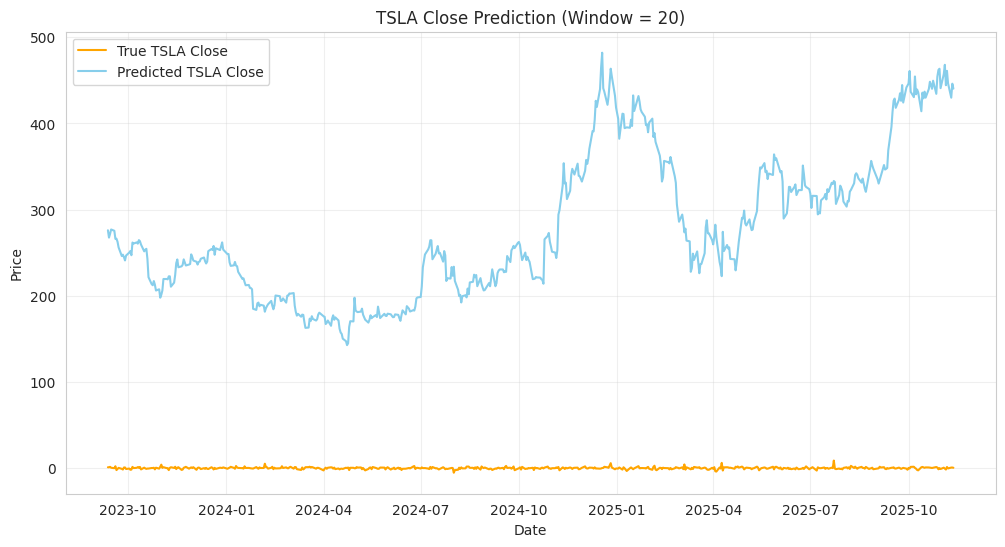


Metrics:
MAE_price: 277.6552
RMSE_price: 289.9169
MAPE_price: 120517.2936
direction_acc: 0.4550

============== Summary ==============
Window Size 20 → Test MAE = {'MAE_price': np.float64(277.6551546805399), 'RMSE_price': np.float64(289.91694378489194), 'MAPE_price': np.float64(120517.29358501462), 'direction_acc': np.float64(0.45504587155963305)}



In [30]:
results = {}
ws = 20

## tsla+다른 한 종목의 log return 2개 사용해서->tsla의 log return 예측
results[ws] = run_experiment(df_vwagy_tm,[0,3],4,ws)
print("\n============== Summary ==============")
for idx, mae in results.items():
    print(f"Window Size 20 → Test MAE = {mae}")
print("=====================================\n")

## 2. 다른 종목만 사용해서 tsla 예측
**결과:**
1. vwagy -> tsla

MAE_price: 7.8619
RMSE_price: 10.9586
MAPE_price: 2.8165
direction_acc: 0.4862

2. tm -> tsla

MAE_price: 8.2774
RMSE_price: 11.6702
MAPE_price: 2.9461
direction_acc: 0.4844


 Running Window Size = 20

# Train: 1949
# Val:   217
# Test:  546
# Input shape: (20, 1)
Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0025 - mae: 0.0358 - val_loss: 0.0015 - val_mae: 0.0295
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mae: 0.0254 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mae: 0.0247 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mae: 0.0247 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - mae: 0.0254 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mae: 0.0235 - val_los

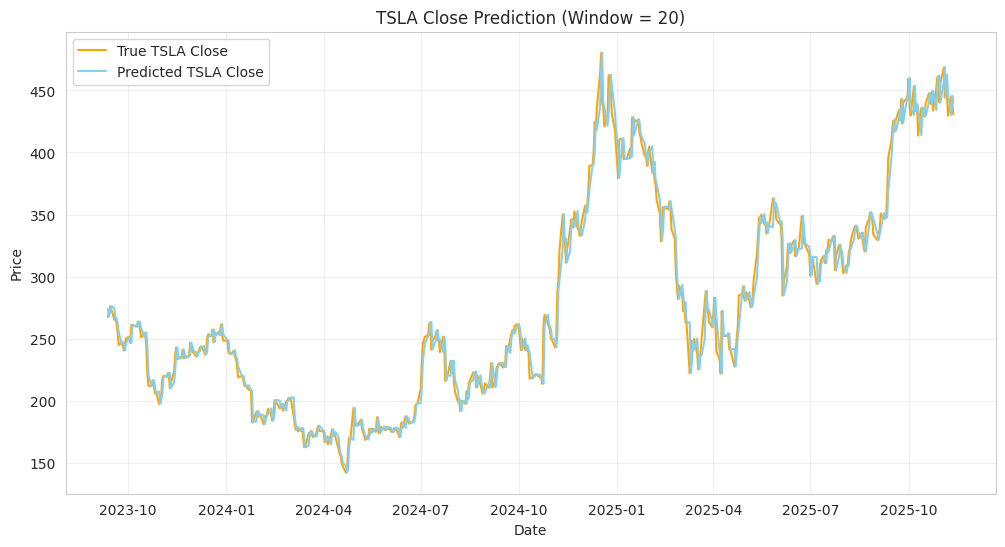


Metrics:
MAE_price: 7.8619
RMSE_price: 10.9586
MAPE_price: 2.8165
direction_acc: 0.4862

============== Summary ==============
Window Size 20 → Test MAE = {'MAE_price': np.float64(7.861898465937043), 'RMSE_price': np.float64(10.958606942204487), 'MAPE_price': np.float64(2.816483315444063), 'direction_acc': np.float64(0.48623853211009177)}


 Running Window Size = 20

# Train: 1949
# Val:   217
# Test:  546
# Input shape: (20, 1)
Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0017 - mae: 0.0292 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0249 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - mae: 0.0241 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - mae: 0.0238 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - mae: 0.0250 - val_loss: 0.001

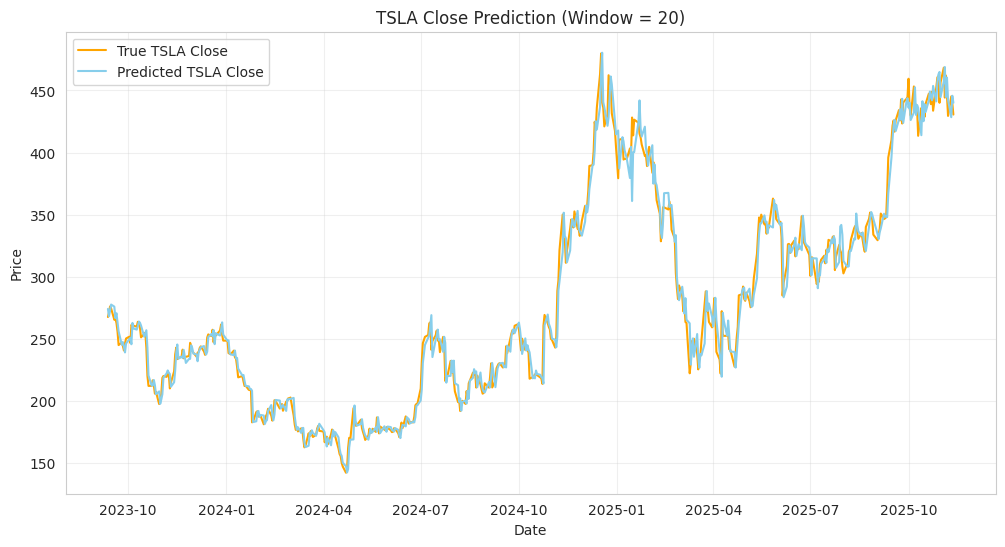


Metrics:
MAE_price: 8.2774
RMSE_price: 11.6702
MAPE_price: 2.9461
direction_acc: 0.4844

============== Summary ==============
Window Size 20 → Test MAE = {'MAE_price': np.float64(8.277436906165471), 'RMSE_price': np.float64(11.670229746918267), 'MAPE_price': np.float64(2.9461070284228135), 'direction_acc': np.float64(0.48440366972477067)}



In [ ]:
# 다른 종목 log return->tsla log return->tesla close price
for name in df_names:
  results[ws] = run_experiment(merged_df[name],[0],3,ws)
  print("\n============== Summary ==============")
  for ws, mae in results.items():
      print(f"Window Size 20 → Test MAE = {mae}")
  print("=====================================\n")

## 3. tsla 단일 데이터로 tsla 예측
**결과:**

MAE_price: 7.8604
RMSE_price: 10.9404
MAPE_price: 2.8229
direction_acc: 0.4862


 Running Window Size = 20

# Train: 1949
# Val:   217
# Test:  546
# Input shape: (20, 1)
Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0021 - mae: 0.0325 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - mae: 0.0248 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 0.0015 - val_mae: 0.0293
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - mae: 0.0257 - val_loss: 0.0015 - val_mae: 0.0294
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0248 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - mae: 0.0245 - val_l

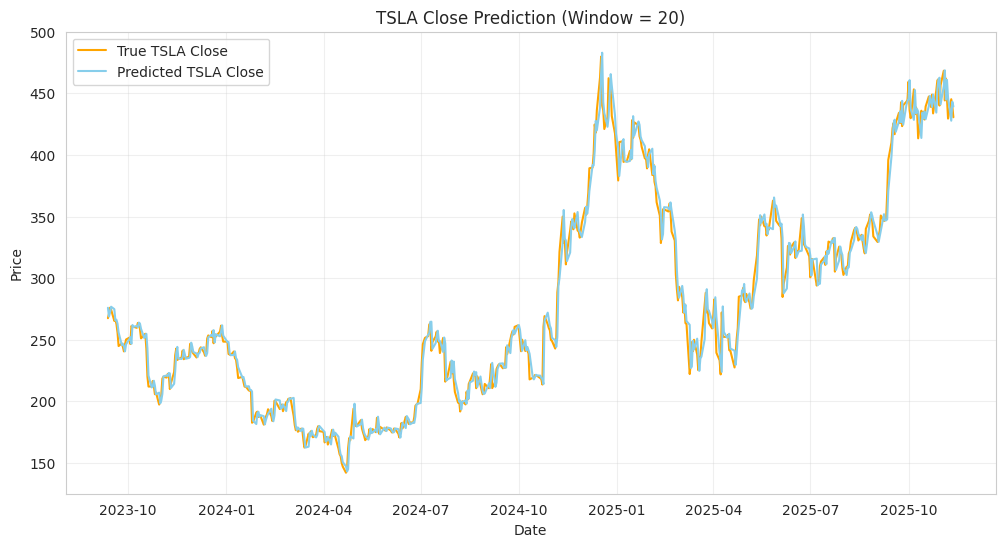


Metrics:
MAE_price: 7.8604
RMSE_price: 10.9404
MAPE_price: 2.8229
direction_acc: 0.4862

============== Summary ==============
Window Size 20 → Test MAE = {'MAE_price': np.float64(7.860362202440908), 'RMSE_price': np.float64(10.940390022718963), 'MAPE_price': np.float64(2.822889993981691), 'direction_acc': np.float64(0.48623853211009177)}



In [ ]:
##tsla log return->tsla log return->tsla close price: 즉, 주가 단일 데이터 사용했을 때(baseline)
results[ws] = run_experiment(merged_df['vwagy_tsla'],[2],3,ws)
print("\n============== Summary ==============")
for ws, mae in results.items():
    print(f"Window Size 20 → Test MAE = {mae}")
print("=====================================\n")

## **Final Summary**

**1. tsla->tsla 예측(baseline)**

MAE_price: 7.8604
RMSE_price: 10.9404
MAPE_price: 2.8229
direction_acc: 0.4862

**2. 다른 종목->tsla 예측**

(1). vwagy -> tsla

MAE_price: 7.8619
RMSE_price: 10.9586
MAPE_price: 2.8165
direction_acc: 0.4862

(2). tm -> tsla

MAE_price: 8.2774
RMSE_price: 11.6702
MAPE_price: 2.9461
direction_acc: 0.4844

**3, 두 종목 모두 이용(tsla+다른 종목 하나)**

(1). vwagy & tsla

MAE_price: 7.8310
RMSE_price: 10.9352
MAPE_price: 2.8001
direction_acc: 0.4826

(2). tm & tsla

MAE_price: 7.9902
RMSE_price: 11.1807
MAPE_price: 2.8653
direction_acc: 0.4844